In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
data = pd.read_csv("Salary Data.csv")
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [78]:
data.shape

(375, 6)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [80]:
data = data.dropna()
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [81]:
data.shape

(373, 6)

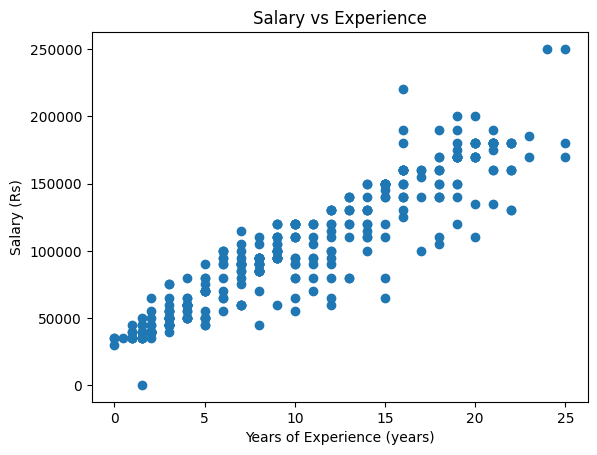

In [82]:
plt.scatter(data['Years of Experience'], data['Salary'])
plt.xlabel("Years of Experience (years)")
plt.ylabel("Salary (Rs)")
plt.title("Salary vs Experience")
plt.show()

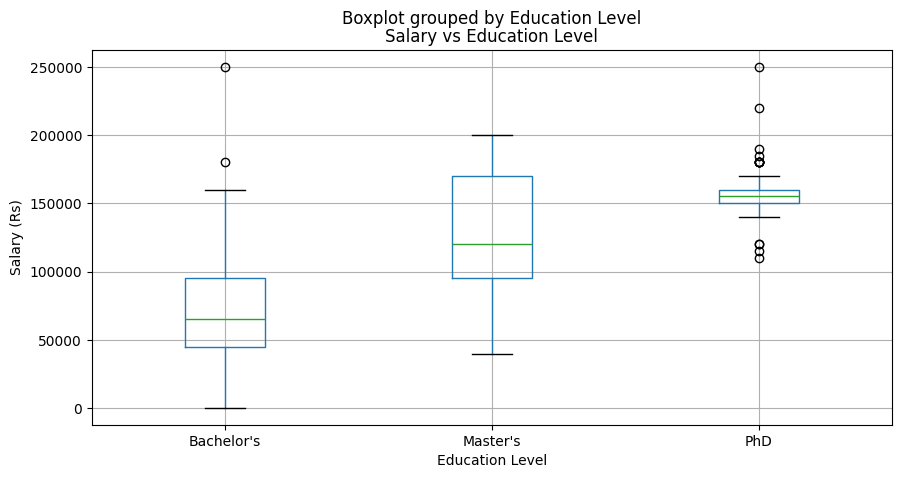

In [83]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
data.boxplot('Salary','Education Level',ax=ax)
plt.title("Salary vs Education Level")
plt.xlabel("Education Level")
plt.ylabel("Salary (Rs)")
plt.show()

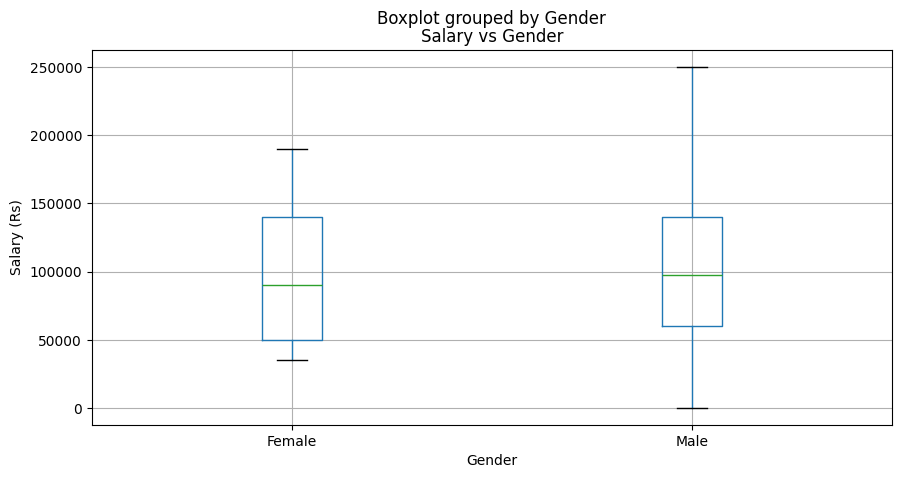

In [84]:
fig1,ax1 = plt.subplots(1,1,figsize=(10,5))
data.boxplot('Salary','Gender',ax=ax1)
plt.title("Salary vs Gender")
plt.xlabel("Gender")
plt.ylabel("Salary (Rs)")
plt.show()

In [85]:
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender'])
data['Gender'].unique()

array([1, 0])

In [86]:
le_edu = LabelEncoder()
data['Education Level'] = le_edu.fit_transform(data['Education Level'])
data['Education Level'].unique()

array([0, 1, 2])

In [87]:
data = data.drop('Job Title',axis=1)
data.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1,0,5.0,90000.0
1,28.0,0,1,3.0,65000.0
2,45.0,1,2,15.0,150000.0
3,36.0,0,0,7.0,60000.0
4,52.0,1,1,20.0,200000.0


In [88]:
X = data.drop('Salary',axis=1)
y = data['Salary']

In [89]:
X.head()

,Age,Gender,Education Level,Years of Experience
0,32.0,1,0,5.0
1,28.0,0,1,3.0
2,45.0,1,2,15.0
3,36.0,0,0,7.0
4,52.0,1,1,20.0


In [90]:
y.head()

0     90000.0
1     65000.0
2    150000.0
3     60000.0
4    200000.0
Name: Salary, dtype: float64

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((298, 4), (75, 4), (298,), (75,))

In [93]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [94]:
y_pred = lr.predict(X_test)
y_pred.shape

(75,)

In [95]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print(f"Mean error = {np.sqrt(mse)}")
mpererr = mean_absolute_percentage_error(y_test,y_pred)
print(f"Mean absolute percentage error = {mpererr*100} %")
acc = 1-mpererr
print(f"Accuracy = {acc*100} %")

Mean error = 15251.06647187825
Mean absolute percentage error = 11.431413074717984 %
Accuracy = 88.56858692528202 %


In [96]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [97]:
y_pred_dtr = dtr.predict(X_test)
y_pred_dtr.shape

(75,)

In [98]:
mse_dtr = mean_squared_error(y_test,y_pred_dtr)
print(f"Mean error = {np.sqrt(mse_dtr)}")
mpererr_dtr = mean_absolute_percentage_error(y_test,y_pred_dtr)
print(f"Mean absolute percentage error = {mpererr_dtr*100} %")
acc_dtr = 1-mpererr_dtr
print(f"Accuracy = {acc_dtr*100} %")

Mean error = 15158.107898804734
Mean absolute percentage error = 9.262238483146637 %
Accuracy = 90.73776151685337 %


In [99]:
from sklearn.ensemble import RandomForestRegressor
ranfor = RandomForestRegressor()
ranfor.fit(X_train,y_train)

RandomForestRegressor()

In [100]:
y_pred_ranfor = ranfor.predict(X_test)
y_pred_ranfor.shape

(75,)

In [101]:
mse_ranfor = mean_squared_error(y_test,y_pred_ranfor)
print(f"Mean error = {np.sqrt(mse_ranfor)}")
mpererr_ranfor = mean_absolute_percentage_error(y_test,y_pred_ranfor)
print(f"Mean absolute percentage error = {mpererr_ranfor*100} %")
acc_ranfor = 1-mpererr_ranfor
print(f"Accuracy = {acc_ranfor*100} %")

Mean error = 15958.492907032954
Mean absolute percentage error = 9.749787673301316 %
Accuracy = 90.25021232669869 %


In [102]:
import pickle

In [103]:
d = {"model":dtr,"le_education":le_edu,"le_gender":le_gender}
with open('saved.pkl', 'wb') as file:
    pickle.dump(d,file)

In [104]:
with open('saved.pkl', 'rb') as file:
    pickle.load(file)

# sample

In [105]:
A = np.array([[30,"Male","Bachelor's",6]])
A[:,1]=le_gender.transform(A[:,1])
A[:,2]=le_edu.transform(A[:,2])
A.astype(float)
A

array([['30', '1', '0', '6']], dtype='<U11')

In [106]:
b = dtr.predict(A)
b.astype(float)

c:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([55000.])